In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from random import sample
import shapely.ops as so

towns_shapefile = "../Data/morrisMunicipalities/Municipalities.shp"
gdf = gpd.read_file(towns_shapefile).reset_index()
gdf = gdf.to_crs(4326)

imgs = pd.read_csv("./csv/randomImagePairInfo.csv")
#imgs = pd.read_csv("./csv/cleaned_morris_address.csv")

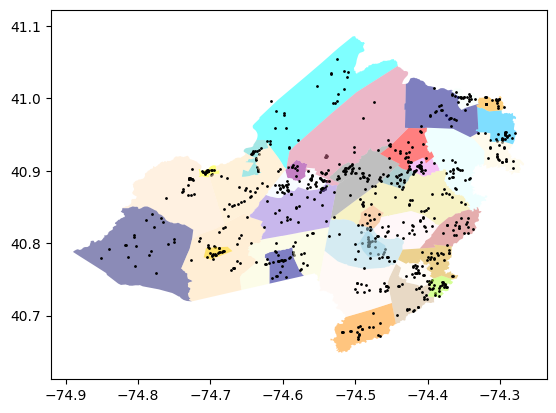

In [286]:
fig,ax = plt.subplots()
ax.set_aspect('equal','datalim')
colors = sample(list(mcolors.CSS4_COLORS.keys()), 39)

for i in range(39):
    # Plot polygon
    town = gdf.loc[gdf.index[i]]
    if town.geometry.geom_type == 'Polygon':
        x, y = town.geometry.exterior.xy
        ax.fill(x, y, alpha=0.5, fc=colors[i], ec='none')
    elif town.geometry.geom_type == 'MultiPolygon':
        new_shape = so.unary_union(town.geometry)
        for geom in new_shape.geoms:
            x, y = geom.exterior.xy
            ax.fill(x, y, alpha=0.5, fc=colors[i], ec='none')
    
    # Plot addresses
    imgs_coords = imgs[imgs.town == town.Label][["lat","long"]]
    lat = imgs_coords.lat
    long = imgs_coords.long
    plt.scatter(long, lat, color='k', s=1)
    
plt.show()